In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank=pd.read_csv('bank 1.csv')

In [3]:
bank.head(10)

,x1,x2,T,x3,x4,x5,x6,x7,x8,x8.1,x9,x10,x11,x12,x13,x14,x15
0,1162,0,0,0,1,0,1,0,0,1,1.0,1,1,0,0,0,0
1,1188,0,0,0,1,1,0,1,0,0,1.0,0,0,1,0,0,0
2,1188,0,0,0,1,0,0,1,0,0,1.0,0,0,1,0,0,0
3,1188,0,0,0,1,1,0,1,0,0,1.0,0,0,1,0,0,0
4,1188,0,0,0,1,0,0,1,0,0,1.0,1,1,1,0,0,0
5,1188,0,0,0,1,1,0,1,0,1,1.0,0,0,1,0,0,0
6,1188,0,0,0,1,1,0,1,0,0,1.0,0,0,1,0,0,0
7,1188,0,0,0,1,1,1,0,0,0,1.0,1,1,1,0,0,0
8,1188,0,0,0,1,1,0,1,0,0,1.0,0,0,1,0,0,0
9,1188,0,0,0,1,1,0,1,0,0,1.0,0,0,1,0,0,0


In [4]:
bank.drop(['x1'] , axis=1 , inplace=True)
bank.drop(['x9'], axis=1 , inplace=True)

In [5]:
bank

,x2,T,x3,x4,x5,x6,x7,x8,x8.1,x10,x11,x12,x13,x14,x15
0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0
1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,0,1,0,0,1,1,0,1,0,1,1,0,0,1,0
10739,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0
10740,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0
10741,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0


In [6]:
x=bank.drop('T' ,axis=1).values
y=bank['T'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=0)

In [8]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=45)
X_res, y_res = sm.fit_resample(x,y)

In [9]:
np.bincount(y_res)

array([9341, 9341], dtype=int64)

In [10]:
minoo=pd.DataFrame(X_res, y_res)

In [11]:
minoo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,1,0,1,0,0,1,1,1,0,0,0,0
0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
0,0,0,1,0,0,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0,1,0,1,1,0,0,0,0,0,0,0,1,0
1,0,1,0,1,1,0,0,0,0,0,0,0,1,0
1,0,1,0,1,1,1,0,0,1,1,0,0,1,0
1,0,1,0,1,1,0,0,0,0,0,0,0,1,0


In [12]:
minoo.to_csv("SMOTE_DATA.csv")

### LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
lo= LogisticRegression(random_state=0)
lo.fit(X_res, y_res)

LogisticRegression(random_state=0)

In [14]:
y_predict = lo.predict(x_test)

<AxesSubplot:>

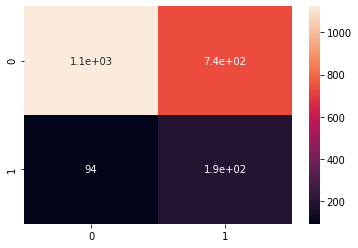

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predict)
sns.heatmap( cm ,  annot =True )

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.92      0.60      0.73      1861
           1       0.21      0.67      0.32       288

    accuracy                           0.61      2149
   macro avg       0.57      0.64      0.52      2149
weighted avg       0.83      0.61      0.67      2149



In [16]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, y_predict)
a

0.6128431828757561

### K_nearestneighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier(n_neighbors = 5 , metric= 'minkowski' , p=2)
kn.fit(X_res, y_res)

KNeighborsClassifier()

In [18]:
y_predict = kn.predict(x_test)

<AxesSubplot:>

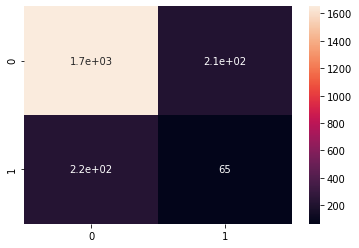

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predict)
sns.heatmap( cm ,  annot =True )

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1861
           1       0.24      0.23      0.23       288

    accuracy                           0.80      2149
   macro avg       0.56      0.56      0.56      2149
weighted avg       0.79      0.80      0.80      2149



In [21]:
from sklearn.metrics import accuracy_score
b=accuracy_score(y_test, y_predict)
b

0.7989762680316427

### Decision Trees and random forest

<AxesSubplot:>

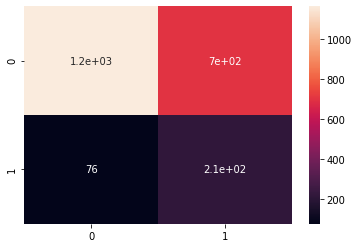

In [22]:
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100 , criterion='entropy')
random.fit(X_res, y_res)
y_predict= random.predict(x_test)
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75      1861
           1       0.23      0.74      0.35       288

    accuracy                           0.64      2149
   macro avg       0.59      0.68      0.55      2149
weighted avg       0.84      0.64      0.70      2149



In [24]:
from sklearn.metrics import accuracy_score
c=accuracy_score(y_test, y_predict)
c

0.6398324802233597

### Naive bayes classification

<AxesSubplot:>

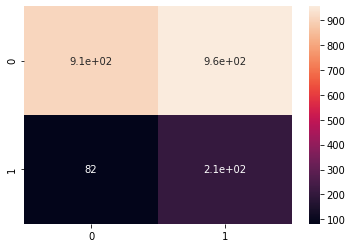

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report ,confusion_matrix
na=MultinomialNB()
na.fit(X_res, y_res)
y_predict=na.predict(x_test)
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm , annot=True)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.92      0.49      0.64      1861
           1       0.18      0.72      0.28       288

    accuracy                           0.52      2149
   macro avg       0.55      0.60      0.46      2149
weighted avg       0.82      0.52      0.59      2149



In [74]:
from sklearn.metrics import accuracy_score
d=accuracy_score(y_test, y_predict)
d

0.5174499767333643

### support vector machine

In [58]:
from sklearn.svm import SVC

In [59]:
sup=SVC()

In [60]:
sup.fit(X_res, y_res)

SVC()

<AxesSubplot:>

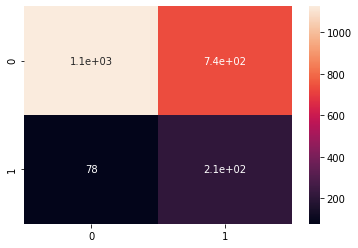

In [61]:
y_predict=sup.predict(x_test)
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm , annot=True)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73      1861
           1       0.22      0.73      0.34       288

    accuracy                           0.62      2149
   macro avg       0.58      0.67      0.54      2149
weighted avg       0.84      0.62      0.68      2149



In [63]:
from sklearn.metrics import accuracy_score
e=accuracy_score(y_test, y_predict)
e

0.6212191717077711

### xgboost

In [36]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_res, y_res)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:>

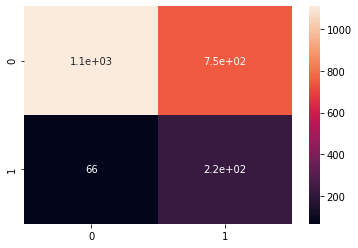

In [37]:
from sklearn.metrics import classification_report ,confusion_matrix
y_predict=xg.predict(x_test)
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm , annot=True)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73      1861
           1       0.23      0.77      0.35       288

    accuracy                           0.62      2149
   macro avg       0.59      0.68      0.54      2149
weighted avg       0.85      0.62      0.68      2149



In [39]:
from sklearn.metrics import accuracy_score
f=accuracy_score(y_test, y_predict)
f

0.6198231735691019

### catboost

In [40]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(X_res, y_res)

Learning rate set to 0.035961
0:	learn: 0.6873284	total: 199ms	remaining: 3m 18s
1:	learn: 0.6831284	total: 204ms	remaining: 1m 41s
2:	learn: 0.6769616	total: 208ms	remaining: 1m 9s
3:	learn: 0.6722717	total: 212ms	remaining: 52.9s
4:	learn: 0.6675432	total: 217ms	remaining: 43.1s
5:	learn: 0.6629635	total: 221ms	remaining: 36.6s
6:	learn: 0.6590217	total: 225ms	remaining: 31.9s
7:	learn: 0.6548044	total: 229ms	remaining: 28.4s
8:	learn: 0.6514267	total: 234ms	remaining: 25.7s
9:	learn: 0.6483210	total: 238ms	remaining: 23.5s
10:	learn: 0.6449141	total: 242ms	remaining: 21.7s
11:	learn: 0.6422416	total: 246ms	remaining: 20.2s
12:	learn: 0.6396463	total: 250ms	remaining: 19s
13:	learn: 0.6370589	total: 255ms	remaining: 17.9s
14:	learn: 0.6345619	total: 259ms	remaining: 17s
15:	learn: 0.6322828	total: 262ms	remaining: 16.1s
16:	learn: 0.6303793	total: 267ms	remaining: 15.4s
17:	learn: 0.6288202	total: 271ms	remaining: 14.8s
18:	learn: 0.6268619	total: 275ms	remaining: 14.2s
19:	learn: 0.

<AxesSubplot:>

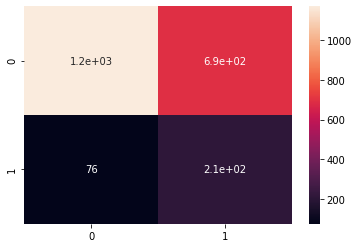

In [41]:
from sklearn.metrics import classification_report ,confusion_matrix
y_predict=cat.predict(x_test)
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm , annot=True)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.94      0.63      0.75      1861
           1       0.23      0.74      0.36       288

    accuracy                           0.64      2149
   macro avg       0.59      0.68      0.55      2149
weighted avg       0.84      0.64      0.70      2149



In [43]:
from sklearn.metrics import accuracy_score
g=accuracy_score(y_test, y_predict)
g

0.642624476500698

<BarContainer object of 6 artists>

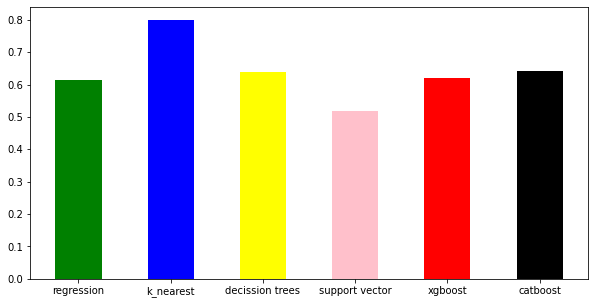

In [75]:
plt.figure(figsize=(10,5))
left=[1,2,3,4,5,6]
high=[a,b,c,d,f,g]
tic=['regression' , 'k_nearest' , 'decission trees' ,'support vector', 'xgboost' , 'catboost']
plt.bar(left, high ,tick_label=tic  ,width=0.5 ,color=['green' , 'blue' ,'yellow' ,'pink','red','black'])

In [78]:
from sklearn import datasets
from sklearn.metrics import roc_curve, roc_auc_score

In [77]:
rf_predict=lo.predict(x_test)
nb_predict=na.predict(x_test)
lg_predict=random.predict(x_test)
kn_predict=kn.predict(x_test)
xg_predict=xg.predict(x_test)
ca_predict=cat.predict(x_test)
su_predict=sup.predict(x_test)

In [79]:
rf_auc=roc_auc_score(y_test,rf_predict)
nb_auc=roc_auc_score(y_test,nb_predict)
lg_auc=roc_auc_score(y_test,lg_predict)
kn_auc=roc_auc_score(y_test,kn_predict)
xg_auc=roc_auc_score(y_test,xg_predict)
ca_auc=roc_auc_score(y_test,ca_predict)
su_auc=roc_auc_score(y_test,su_predict)

In [80]:
rf_fpr,rf_tpr,_ =roc_curve(y_test,rf_predict)
nb_fpr,nb_tpr,_ =roc_curve(y_test,nb_predict)
lg_fpr,lg_tpr,_ =roc_curve(y_test,lg_predict)
kn_fpr,kn_tpr,_ =roc_curve(y_test,kn_predict)
xg_fpr,xg_tpr,_ =roc_curve(y_test,xg_predict)
ca_fpr,ca_tpr,_ =roc_curve(y_test,ca_predict)
su_fpr,su_tpr,_ =roc_curve(y_test,su_predict)

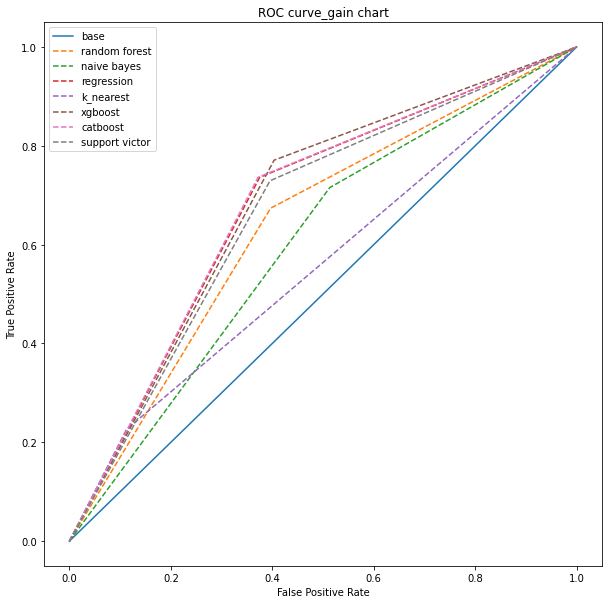

In [81]:
plt.subplots(1, figsize=(10,10))
r=[0,0.5,1]
p=r
plt.plot(r,p , linestyle='-', label='base')
plt.plot(rf_fpr,rf_tpr , linestyle='--' , label='random forest')
plt.plot(nb_fpr,nb_tpr , linestyle='--' , label='naive bayes')
plt.plot(lg_fpr,lg_tpr , linestyle='--' , label='regression')
plt.plot(kn_fpr,kn_tpr , linestyle='--' , label='k_nearest')
plt.plot(xg_fpr,xg_tpr , linestyle='--' , label='xgboost')
plt.plot(ca_fpr,ca_tpr , linestyle='--' , label='catboost')
plt.plot(su_fpr,su_tpr , linestyle='--' , label='support victor')



plt.title('ROC curve_gain chart')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()